<a href="https://colab.research.google.com/github/rajatraiii/Capstone-project/blob/main/Mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME:- Hospital Mortality Predcition using ML**

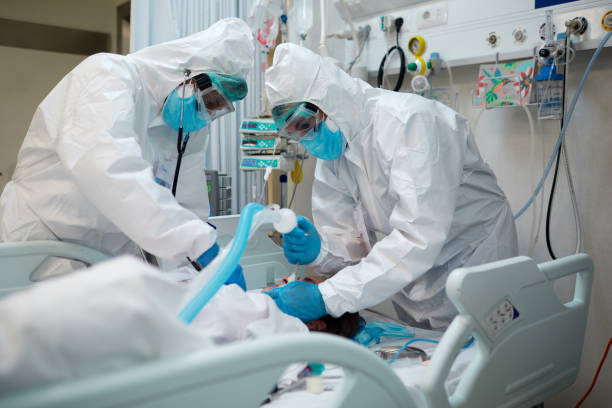

# **Context**

The predictors of in-hospitality mortality for intensive care units(ICU)-admitted HF patients remain poorly chracterized.We aimed to develop and validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients.

We will use different ML models to predict the outcome. 

# Time Line  of the Project:




*   Data Analysis
*   Data Preprocessing

*   Model Building and Prediction using ML models








**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mortality.csv to mortality.csv
User uploaded file "mortality.csv" with length 389031 bytes


In [3]:
data=pd.read_csv("mortality.csv")

In [4]:
data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [5]:
data.shape

(1177, 51)

In [6]:
data.columns = data.columns.str.replace(' ', '_')

In [7]:
data.isnull().sum()
data.isna().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD_with_no_MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal_failure                 0
COPD                          0
heart_rate                   13
Systolic_blood_pressure      16
Diastolic_blood_pressure     16
Respiratory_rate             13
temperature                  19
SP_O2                        13
Urine_output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [8]:
data['heart_rate']=data['heart_rate'].fillna(data['heart_rate'].mean())

In [9]:
for i in data.columns:
    if data[i].isnull().sum()>1:
        data[i]=data[i].fillna(data[i].mean())
        
        
data = data.dropna(how='any',axis=0)
data = data.drop(['ID'],axis=1)
data = data.drop(['group'],axis=1)

In [10]:
data.isnull().sum()
data.isna().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

In [11]:
data.groupby('outcome').mean().reset_index()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,deficiencyanemias,depression,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
0,0.0,73.694882,1.530512,30.372398,0.731299,0.431102,0.087598,0.430118,0.358268,0.126969,...,139.003678,8.543400,102.166304,13.683754,2.112936,7.381721,27.364254,1.777537,45.736739,48.826772
1,1.0,76.238994,1.496855,29.056624,0.635220,0.578616,0.075472,0.358491,0.220126,0.069182,...,138.201392,8.235897,103.098958,15.464411,2.167376,7.357831,24.002300,2.335380,44.244755,47.924528


In [12]:
numerical_features = [features for features in data.columns if len(data[features].unique())>5]
categorical_features = [features for features in data.columns if features not in numerical_features]

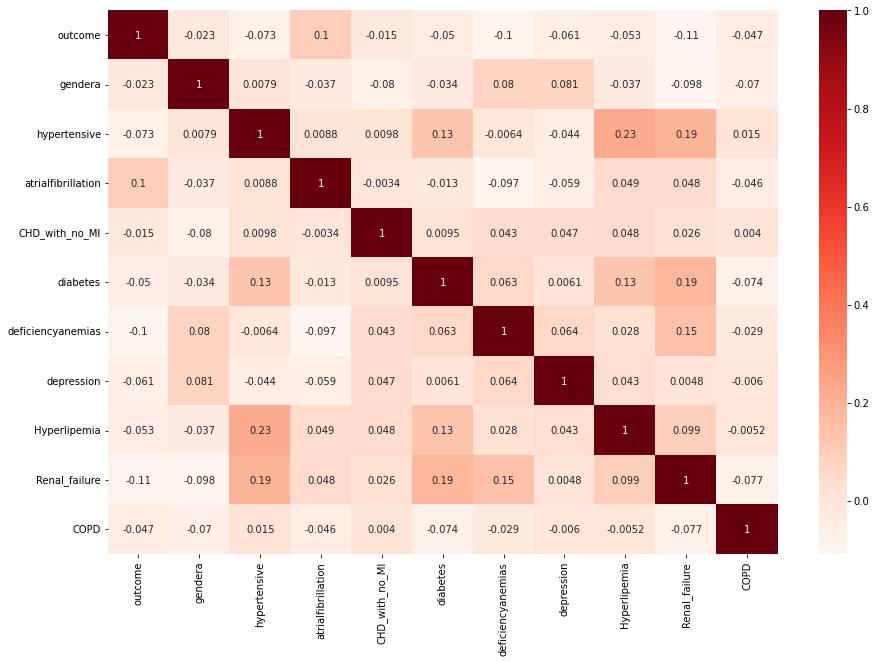

In [13]:
## Using pearson Correlation 

plt.figure(figsize=(15,10))
cor=data[categorical_features].corr()
sns.heatmap(cor , annot=True,cmap=plt.cm.Reds)
plt.show()

In [14]:
data.corr()['outcome'].sort_values(ascending=False).head()

outcome          1.000000
Anion_gap        0.229566
Lactic_acid      0.216073
Leucocyte        0.208354
Urea_nitrogen    0.202920
Name: outcome, dtype: float64

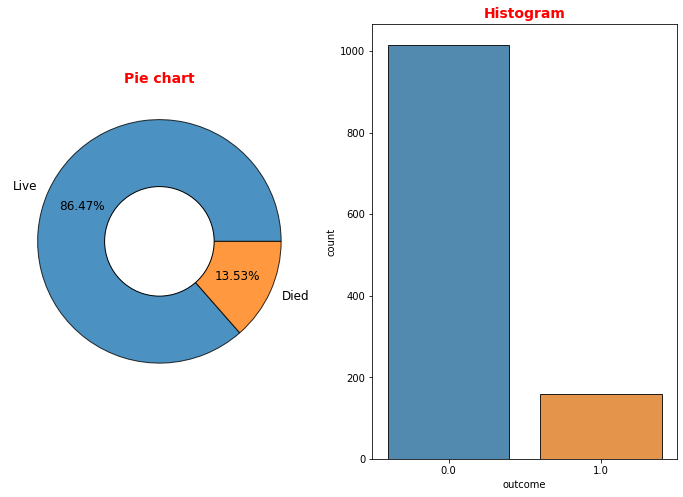

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
labels=['Live','Died']
plt.title('Pie chart', fontweight='bold', fontsize='14',fontfamily='sans-serif',color='red')
plt.pie(data['outcome'].value_counts(),labels=labels, pctdistance=0.7,autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='black'),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)


countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color='red')
ax = sns.countplot(x='outcome', data=data,
                   edgecolor='black', alpha=0.85)  

In [16]:
data['outcome'].value_counts()

0.0    1016
1.0     159
Name: outcome, dtype: int64

In [17]:
df_outcome_0=data[data['outcome']==0]
df_outcome_1 = data[data['outcome']==1]

outcome_0 = df_outcome_0.sample(n=159)

new_data = pd.concat([df_outcome_1,outcome_0],axis=0)

In [18]:
new_data.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,deficiencyanemias,depression,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
16,1.0,83,2,30.188278,1,0,0,0,1,0,...,132.818182,8.888889,94.700000,14.500000,2.055556,7.368333,28.800000,0.700000,54.916667,30
21,1.0,78,2,37.851434,1,0,0,1,0,0,...,142.818182,8.320000,107.454545,12.545455,2.010000,7.333333,26.363636,0.750000,52.000000,55
27,1.0,89,1,30.188278,1,1,0,0,0,0,...,142.555556,7.400000,111.555556,12.333333,1.862500,7.440000,22.666667,0.800000,35.000000,55
37,1.0,89,2,19.980509,1,1,1,0,1,0,...,143.166667,8.816667,110.833333,16.333333,1.900000,7.302000,20.000000,0.825000,39.200000,55
40,1.0,81,1,30.188278,0,1,0,0,1,0,...,130.833333,9.350000,100.833333,20.200000,2.475000,7.244000,15.800000,0.842857,43.500000,25


In [19]:
X=new_data.drop(['outcome'],axis=1)
Y= new_data['outcome']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [22]:
print(x_train.shape,x_test.shape)

(286, 48) (32, 48)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
stand = StandardScaler()
stand.fit(x_train)

x_train_stand = stand.transform(x_train)
x_test_stand = stand.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report


In [32]:
lr = LogisticRegression()
lr.fit(x_train_stand,y_train)

LogisticRegression()

In [37]:
y_pred_lr = lr.predict(x_test_stand)
y_train_pred_lr=lr.predict(x_train_stand)

In [38]:
#getting all scores for Logistic Regression
train_accuracy_lr = round(accuracy_score(y_train_pred_lr,y_train), 3)
accuracy_lr = round(accuracy_score(y_pred_lr,y_test), 3)
precision_score_lr = round(precision_score(y_pred_lr,y_test), 3)
recall_score_lr = round(recall_score(y_pred_lr,y_test), 3)
f1_score_lr = round(f1_score(y_pred_lr,y_test), 3)
roc_score_lr = round(roc_auc_score(y_pred_lr,y_test), 3)

In [39]:
print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", accuracy_lr)
print("The precision on test data is ", precision_score_lr)
print("The recall on test data is ", recall_score_lr)
print("The f1 on test data is ", f1_score_lr)
print("The roc_score on test data is ", roc_score_lr)

The accuracy on train data is  0.825
The accuracy on test data is  0.906
The precision on test data is  0.824
The recall on test data is  1.0
The f1 on test data is  0.903
The roc_score on test data is  0.917


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm=confusion_matrix(y_test,y_pred_lr)

In [44]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        15
         1.0       1.00      0.82      0.90        17

    accuracy                           0.91        32
   macro avg       0.92      0.91      0.91        32
weighted avg       0.92      0.91      0.91        32



**DecisionTreeClassifier**

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
#class prediction of y
y_pred_dtc = dtc.predict(x_test)
y_train_pred_dtc=dtc.predict(x_train)

In [69]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

In [70]:
print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.688
The precision on test data is  0.529
The recall on test data is  0.818
The f1 on test data is  0.643
The roc_score on test data is  0.719


In [71]:
cm=confusion_matrix(y_test,y_pred_dtc)

In [72]:
cm

array([[13,  2],
       [ 8,  9]])

In [73]:
report = classification_report(y_test,y_pred_dtc)
print(report)

              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72        15
         1.0       0.82      0.53      0.64        17

    accuracy                           0.69        32
   macro avg       0.72      0.70      0.68        32
weighted avg       0.72      0.69      0.68        32



**Random Forest Classifier**

In [74]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [76]:
#class prediction of y
y_pred_rfc=rfc.predict(x_test)
y_train_pred_rfc=rfc.predict(x_train)

In [77]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.938
The precision on test data is  0.882
The recall on test data is  1.0
The f1 on test data is  0.938
The roc_score on test data is  0.941


In [78]:
cm=confusion_matrix(y_test,y_pred_rfc)

In [79]:
cm

array([[15,  0],
       [ 2, 15]])

In [81]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        15
         1.0       1.00      0.88      0.94        17

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



**GradientBoostingClassifier**

In [82]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [84]:
#class prediction of y
y_pred_gbc=gbc.predict(x_test)
y_train_pred_gbc=gbc.predict(x_train)

In [85]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  1.0
The accuracy on test data is  0.906
The precision on test data is  0.882
The recall on test data is  0.938
The f1 on test data is  0.909
The roc_score on test data is  0.906


In [86]:
cm=confusion_matrix(y_test,y_pred_gbc)

In [87]:
cm

array([[14,  1],
       [ 2, 15]])

In [88]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        15
         1.0       0.94      0.88      0.91        17

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32



**XGBClassifier**

In [89]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [90]:
xgb=XGBClassifier(random_state=42)

In [91]:
xgb.fit(x_train,y_train)

XGBClassifier(random_state=42)

In [92]:
#class prediction of y
y_pred_xgb=xgb.predict(x_test)
y_train_pred_xgb=xgb.predict(x_train)

In [93]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  0.938
The precision on test data is  0.941
The recall on test data is  0.941
The f1 on test data is  0.941
The roc_score on test data is  0.937


In [94]:
cm=confusion_matrix(y_test,y_pred_xgb)

In [95]:
cm

array([[14,  1],
       [ 1, 16]])

In [96]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.94      0.94      0.94        17

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



**Support Vector Machine**

In [97]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [99]:
#fitting data into Support Vector Classifier
clf=SVC(probability=True)
clf.fit(x_train,y_train)

SVC(probability=True)

In [100]:
#class prediction of y
y_pred_svm=clf.predict(x_test)
y_train_pred_svm=clf.predict(x_train)

In [101]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.601
The accuracy on test data is  0.594
The precision on test data is  0.294
The recall on test data is  0.833
The f1 on test data is  0.435
The roc_score on test data is  0.686


# **Model Comparision**

In [103]:
all_classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_lr, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_lr, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_lr, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_lr, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_lr, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_lr, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [104]:
compare_df = pd.DataFrame({'Classifier':all_classifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score,'recall_score':all_recall_score,'f1_score':all_f1_score,'auc_score':all_auc_score})

In [105]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,recall_score,f1_score,auc_score
0,Logistic Regression,0.825,0.906,0.824,1.000,0.903,0.917
1,Decision Tree,1.000,0.688,0.529,0.818,0.643,0.719
2,Random Forest,1.000,0.938,0.882,1.000,0.938,0.941
3,SVM,0.601,0.594,0.294,0.833,0.435,0.686
4,Gradient Boosting,1.000,0.906,0.882,0.938,0.909,0.906
5,XG Boosting,1.000,0.938,0.941,0.941,0.941,0.937


In [106]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,recall_score,f1_score,auc_score
2,Random Forest,1.000,0.938,0.882,1.000,0.938,0.941
5,XG Boosting,1.000,0.938,0.941,0.941,0.941,0.937
0,Logistic Regression,0.825,0.906,0.824,1.000,0.903,0.917
4,Gradient Boosting,1.000,0.906,0.882,0.938,0.909,0.906
1,Decision Tree,1.000,0.688,0.529,0.818,0.643,0.719
3,SVM,0.601,0.594,0.294,0.833,0.435,0.686


**Here we can see that Random forest classifier shows highest test accuracy and F1 score.**

# **Combined ROC curve for all the models**

In [107]:
#importing roc curve
from sklearn.metrics import roc_curve

In [111]:
#probabilty prediction of y for all model
y_pred_proba_lr = lr.predict_proba(x_test_stand)[:,1]
y_pred_proba_dtc = dtc.predict_proba(x_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(x_test)[:,1]
y_pred_proba_clf = clf.predict_proba(x_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(x_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(x_test)[:,1]

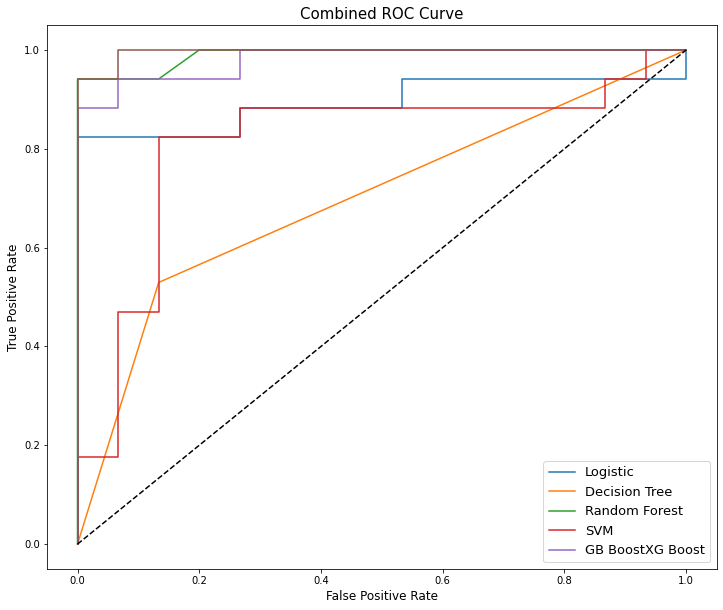

In [112]:
fig = plt.figure(figsize=(12,10)) 

fpr_lr, tpr_lr, _lr = roc_curve(y_test,  y_pred_proba_lr)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_clf)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

**Feature Importance On Random Forest Model**

In [114]:
features = list(i for i in list(new_data.describe(include='all').columns) if i != 'outcome')

In [115]:
feature_importances_rfc = rfc.feature_importances_

In [116]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [117]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

Leucocyte           0.051725
Bicarbonate         0.046904
Lymphocyte          0.043399
Urine_output        0.038705
Blood_calcium       0.034001
Anion_gap           0.033243
Blood_sodium        0.033123
Platelets           0.032750
Urea_nitrogen       0.031927
NT-proBNP           0.030414
Creatine_kinase     0.030031
Respiratory_rate    0.029512
RDW                 0.028923
SP_O2               0.028073
Chloride            0.027463
dtype: float64

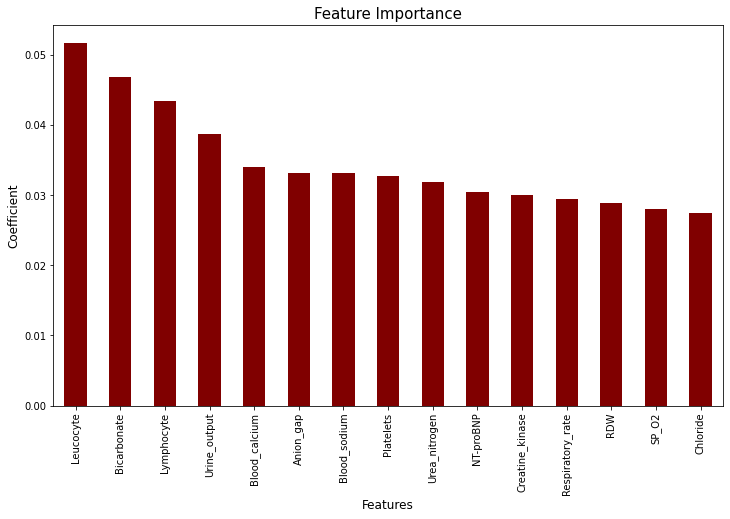

In [118]:
fig = plt.figure(figsize=(12,7)) 
feature_importances_rfc_df.nlargest(15).plot(kind='bar', color='maroon', align='center')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

In [119]:
from sklearn.model_selection import GridSearchCV

In [172]:
# penalty in Logistic Regression Classifier
penalties = ['l2', 'none']

# hyperparameter C
C= [1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [10000,12000],
              'C' : C }

In [173]:
# Create an instance of the Logistic Regression
lr = LogisticRegression()

# Grid search
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
lr_grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.5, 5, 10], 'max_iter': [10000, 12000],
                         'penalty': ['l2', 'none']},
             scoring='roc_auc', verbose=3)

In [174]:
lr_grid.best_estimator_

LogisticRegression(C=5, max_iter=12000)

In [175]:

lr_grid.best_params_

{'C': 5, 'max_iter': 12000, 'penalty': 'l2'}

In [176]:
lr_optimal_model = lr_grid.best_estimator_

In [177]:
#class prediction of y on train and test
y_pred_lr_grid = lr_optimal_model.predict(x_test)
y_train_pred_lr_grid = lr_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_lr_grid = lr_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_lr_grid = lr_optimal_model.predict_proba(x_test)[:,1]

In [178]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_lr_grid = round(accuracy_score(y_train_pred_lr_grid,y_train), 3)
accuracy_lr_grid = round(accuracy_score(y_pred_lr_grid,y_test), 3)
precision_score_lr_grid = round(precision_score(y_pred_lr_grid, y_test), 3)
recall_score_lr_grid = round(recall_score(y_pred_lr_grid,y_test), 3)
f1_score_lr_grid = round(f1_score(y_pred_lr_grid,y_test), 3)
auc_lr_grid = round(roc_auc_score(y_pred_lr_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_lr_grid)
print("The accuracy on test data is ", accuracy_lr_grid)
print("The precision on test data is ", precision_score_lr_grid)
print("The recall on test data is ", recall_score_lr_grid)
print("The f1 on test data is ", f1_score_lr_grid)
print("The auc on test data is ", auc_lr_grid)

The accuracy on train data is  0.801
The accuracy on test data is  0.812
The precision on test data is  0.824
The recall on test data is  0.824
The f1 on test data is  0.824
The auc on test data is  0.812


In [179]:
# Get the confusion matrices for train and test
train_cm_lr_grid = confusion_matrix(y_train,y_train_pred_lr_grid)
test_cm_lr_grid = confusion_matrix(y_test,y_pred_lr_grid )

In [180]:
train_cm_lr_grid

array([[117,  27],
       [ 30, 112]])

In [181]:

test_cm_lr_grid

array([[12,  3],
       [ 3, 14]])

**Decision Tree Classifier**

In [182]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [183]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [184]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=40,
                       min_samples_split=0.001)

In [185]:
dtc_grid.best_params_

{'max_depth': 20, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [186]:
dtc_optimal_model = dtc_grid.best_estimator_

In [188]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(x_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(x_test)[:,1]

In [189]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.71
The accuracy on test data is  0.781
The precision on test data is  0.882
The recall on test data is  0.75
The f1 on test data is  0.811
The auc on test data is  0.792


In [190]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [191]:
train_cm_dtc_grid

array([[ 90,  54],
       [ 29, 113]])

In [192]:
test_cm_dtc_grid

array([[10,  5],
       [ 2, 15]])

**Support Vector Machine**

In [193]:
from sklearn.model_selection import RandomizedSearchCV

In [198]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [199]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(x_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [200]:
svm_grid.best_estimator_

SVC(C=10, probability=True)

In [201]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 10}

In [202]:
svm_optimal_model = svm_grid.best_estimator_

In [203]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(x_test)
y_train_pred_svm_grid=svm_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(x_test)[:,1]

In [204]:
#getting all scores for Support Vector Classifier after CV and Hyperparameter Tunning
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 3)
recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm_grid)
print("The accuracy on test data is ", accuracy_svm_grid)
print("The precision on test data is ", precision_score_svm_grid)
print("The recall on test data is ", recall_score_svm_grid)
print("The f1 on test data is ", f1_score_svm_grid)
print("The auc on test data is ", auc_svm_grid)

The accuracy on train data is  0.629
The accuracy on test data is  0.719
The precision on test data is  0.471
The recall on test data is  1.0
The f1 on test data is  0.64
The auc on test data is  0.812


In [205]:
# Get the confusion matrices for train and test
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid )

In [206]:
train_cm_svm_grid

array([[109,  35],
       [ 71,  71]])

In [207]:
test_cm_svm_grid

array([[15,  0],
       [ 9,  8]])

**Random Forest Classifer**

In [208]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [210]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [211]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [212]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [213]:
rfc_optimal_model = rfc_grid.best_estimator_

In [215]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(x_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(x_test)[:,1]

In [216]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.794
The accuracy on test data is  0.969
The precision on test data is  0.941
The recall on test data is  1.0
The f1 on test data is  0.97
The auc on test data is  0.969


In [217]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [218]:
train_cm_rfc_grid

array([[113,  31],
       [ 28, 114]])

In [219]:
test_cm_rfc_grid

array([[15,  0],
       [ 1, 16]])

**Gradient Boosting**

In [220]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [221]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.5, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.1s
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.25, max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.25, max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=40, min_samples_split=1

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [222]:
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=10, min_samples_leaf=50,
                           min_samples_split=100, random_state=42)

In [223]:
gbc_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 100,
 'min_samples_leaf': 50,
 'max_depth': 10,
 'learning_rate': 0.1}

In [224]:
gbc_optimal_model = gbc_grid.best_estimator_

In [225]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(x_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(x_test)[:,1]

In [226]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.979
The accuracy on test data is  0.938
The precision on test data is  0.882
The recall on test data is  1.0
The f1 on test data is  0.938
The auc on test data is  0.941


In [227]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

In [228]:
train_cm_gbc_grid

array([[142,   2],
       [  4, 138]])

In [229]:
test_cm_gbc_grid

array([[15,  0],
       [ 2, 15]])

**XG Boosting**

In [230]:
from sklearn.model_selection import RandomizedSearchCV

In [231]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [232]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [233]:
xgb_grid.best_estimator_

XGBClassifier(gamma=0.2, learning_rate=0.05, max_depth=25, min_child_weight=3,
              min_samples_leaf=40, n_estimators=250)

In [234]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 40,
 'min_child_weight': 3,
 'max_depth': 25,
 'learning_rate': 0.05,
 'gamma': 0.2}

In [235]:
xgb_optimal_model = xgb_grid.best_estimator_

In [236]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(x_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(x_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(x_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(x_test)[:,1]

In [237]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  1.0
The accuracy on test data is  0.938
The precision on test data is  0.882
The recall on test data is  1.0
The f1 on test data is  0.938
The auc on test data is  0.941


In [238]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

In [239]:
train_cm_xgb_grid

array([[144,   0],
       [  0, 142]])

In [240]:
test_cm_xgb_grid

array([[15,  0],
       [ 2, 15]])

# **Final Model Comparision**



In [242]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_lr_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_lr_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_lr_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_lr_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_lr_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_lr_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [244]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score,'recall_score':grid_recall_score,'f1_score':grid_f1_score,'auc_score':grid_auc_score})

In [245]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [246]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [248]:
all_comparision_df.sort_values('auc_score', axis=0, ascending=False, inplace=True)

In [249]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,recall_score,f1_score,auc_score
8,Optimal Random Forest,0.794,0.969,0.941,1.000,0.970,0.969
2,Random Forest,1.000,0.938,0.882,1.000,0.938,0.941
10,Optimal Gradient Boosting,0.979,0.938,0.882,1.000,0.938,0.941
11,Optimal XG Boosting,1.000,0.938,0.882,1.000,0.938,0.941
5,XG Boosting,1.000,0.938,0.941,0.941,0.941,0.937
0,Logistic Regression,0.825,0.906,0.824,1.000,0.903,0.917
4,Gradient Boosting,1.000,0.906,0.882,0.938,0.909,0.906
6,Optimal Logistic Regression,0.801,0.812,0.824,0.824,0.824,0.812
9,Optimal SVM,0.629,0.719,0.471,1.000,0.640,0.812
7,Optimal Decision Tree,0.710,0.781,0.882,0.750,0.811,0.792


# **Conclusion**





*   From all baseline model, Random forest classifier shows highest test accuracy, F1 score and AUC.
*   Baseline model of decision tree shows huge difference in train and test accuracy which shows overfitting


*   After cross validation and hyperparameter tunning, random forest shows highest test accuracy score of 96.1% and AUC is 0.969.
*   Cross validation and hyperparameter tunning certainly reduces chances of overfitting and also increases performance of model.



